[ 데이터 분석과 시각화 - 대구에서 타지역으로 이동한 추세 분석 ]
- 데이터 셋 : 시도별 전출입 인구수.xlsx
- 타겟/라벨 : 대구광역시
- 피쳐/속성 : 대구광역시를 제외한 나머지 => 탐색적 분석을 통해서 주요 특성 선택
- 탐색 방법 : 데이터셋이 주어졌으므로, 주어진 데이터를 바탕으로 탐색적 분석(EDA)

[진행]
5단계 중 데이터 수집까지의 2단계가 주어짐.
1. 데이터 전처리
2. 시각화 및 탐색
3. 데이터 모델링.

[1] 모듈 로딩 및 데이터 준비 <hr>

In [61]:
## [1-1] 모듈 로딩 
import pandas as pd                     # 데이터 분석 및 전처리용 모듈
import numpy as np                      # 배열(array)을 지원하는 파이썬 패키지

import matplotlib.pyplot as plt         # 데이터 시각화 즉, 그래프 관련 모듈 
import utils                            # 데이터 처리 관련 사용자 정의 모듈

In [62]:
## [1-2] 데이터 준비 
D_FILE = '../DATA/시도별 전출입 인구수.xlsx'

In [63]:
# %pip install openpyxl
## - 첫번째 줄 : 컬러명,  분리자 : , 

koreaDF= pd.read_excel(D_FILE)


[2] 데이터 구조 확인 <hr>

In [64]:
## - 요약 정보 
koreaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [65]:
utils.printUniqueValue(koreaDF)


[전출지별컬럼의 고유값]=====
갯수 :  18
[nan '전국' '서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시'
 '세종특별자치시' '경기도' '강원도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주특별자치도']

[전입지별컬럼의 고유값]=====
갯수 :  18
[nan '전국' '서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시'
 '세종특별자치시' '경기도' '강원도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주특별자치도']

[1970컬럼의 고유값]=====
갯수 :  146
['이동자수 (명)' 4046536 1742813 448577 '-' 452060 160959 100041 192979 136856
 177536 407643 212521 14551 1448985 1232619 11568 130149 9352 6700 15954
 10814 10513 11868 8409 1039 376059 24263 307900 6350 2090 1031 1901 1105
 2613 7791 20249 766 353535 95388 4983 212365 7649 4424 10743 3221 4287
 6171 3916 388 197181 34563 4385 16420 113485 7971 3363 1199 1355 10916
 3279 245 147916 37625 3840 12585 5741 65127 11611 915 3087 5833 1481 71
 240241 67033 4803 19969 3384 5784 121675 4511 5571 4848 2465 198 228126
 71785 6633 14174 2042 1184 12842 104671 8043 4319 2103 330 263908 75871
 9635 15123 2217 1277 5713 7292 137252 4377 

In [66]:
# 18개의 데이터를 다시 18개로 나누어놓은 형태.
# 필요한 데이터는 대분류가 대구인 데이터. 빈데이터를 대구로 채운다음 꺼낼것

# 결측치 다수.
# 울산시와 세종시를 제외하고는 81년부터 데이터가 있으므로
# 울산시와 세종시의 결측치는 0으로 처리하고 
# 80년까지의 결측치는 버림.

[3] 데이터 전처리
- 전출지가 대구인 곳과, 대구에서 타지로 전입한 것은 같은 말이므로
- 전출지가 대구인 18개 데이터만 추출
- 지역명/년도가 고유값이므로 인덱스/컬럼명 으로 사용.
- 80년까지의 결측치를 제거.
- 81년부터의 결측치는 0으로 만들고 처리
- object 타입인 수치들을 정수, 혹은 실수로 만들기


In [67]:
koreaDF['전출지별'].fillna(method='ffill', inplace=True)
daeguDF = koreaDF[koreaDF['전출지별']=='대구광역시']


C:\Users\matdo\AppData\Local\Temp\ipykernel_8068\3244957287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  koreaDF['전출지별'].fillna(method='ffill', inplace=True)
C:\Users\matdo\AppData\Local\Temp\ipykernel_8068\3244957287.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  koreaDF['전출지별'].fillna(method='ffill', inplace=True)


In [68]:
daeguDF.index=daeguDF['전입지별']
daeguDF.drop(columns='전출지별', inplace=True )
daeguDF.drop(columns='전입지별', inplace=True )
daeguDF

C:\Users\matdo\AppData\Local\Temp\ipykernel_8068\2112699613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daeguDF.drop(columns='전출지별', inplace=True )
C:\Users\matdo\AppData\Local\Temp\ipykernel_8068\2112699613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daeguDF.drop(columns='전입지별', inplace=True )


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,-,-,-,-,-,-,-,-,-,-,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
서울특별시,-,-,-,-,-,-,-,-,-,-,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,-,-,-,-,-,-,-,-,-,-,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
대구광역시,-,-,-,-,-,-,-,-,-,-,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
인천광역시,-,-,-,-,-,-,-,-,-,-,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,-,-,-,-,-,-,-,-,-,-,...,563,624,527,577,711,622,902,629,547,515
대전광역시,-,-,-,-,-,-,-,-,-,-,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,-,-,-,-,-,-,-,-,-,-,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,261,233,526,879,642,827


In [69]:
daeguDF = daeguDF.T
daeguDF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1970 to 2017
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   전국       48 non-null     object
 1   서울특별시    48 non-null     object
 2   부산광역시    48 non-null     object
 3   대구광역시    48 non-null     object
 4   인천광역시    48 non-null     object
 5   광주광역시    48 non-null     object
 6   대전광역시    48 non-null     object
 7   울산광역시    48 non-null     object
 8   세종특별자치시  48 non-null     object
 9   경기도      48 non-null     object
 10  강원도      48 non-null     object
 11  충청북도     48 non-null     object
 12  충청남도     48 non-null     object
 13  전라북도     48 non-null     object
 14  전라남도     48 non-null     object
 15  경상북도     48 non-null     object
 16  경상남도     48 non-null     object
 17  제주특별자치도  48 non-null     object
dtypes: object(18)
memory usage: 8.2+ KB


전입지별,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
1970,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1971,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1972,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1973,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1974,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1975,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1976,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1977,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1978,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1979,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [83]:
for i in daeguDF.index:
    if i == '1981':
        break
    daeguDF.drop(i,inplace=True)
# 80년도 까지의 자료를 삭제
daeguDF

전입지별,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
1981,481534,19760,10590,348566,1440,0,0,0,0,4885,3333,1748,2427,1594,1875,70840,14182,294
1982,521117,23725,10732,393803,1640,0,0,0,0,6273,3211,1805,2983,1649,1782,58430,14746,338
1983,582412,32205,10512,438255,1921,0,0,0,0,8204,3099,1933,3057,1638,1812,63729,15522,525
1984,525143,28897,10804,390862,1927,0,0,0,0,7742,2883,1692,3250,1377,1933,57719,15649,408
1985,518560,25736,10696,384972,2036,0,0,0,0,7622,2961,1632,3211,1552,1751,61250,14750,391
1986,513581,21724,10114,383388,1922,517,0,0,0,8341,2928,1655,3280,1553,1526,61419,14816,398
1987,570103,20130,10496,429854,2074,529,0,0,0,9169,2360,1847,3340,1424,1461,71529,15424,466
1988,558115,22080,10019,417433,1927,629,0,0,0,9005,2135,1637,3164,1174,1173,72574,14707,458
1989,517090,21201,8789,387612,2272,704,2014,0,0,9368,2257,1862,1218,1066,1335,62765,14144,483
1990,528024,19521,8848,387458,2438,620,2169,0,0,10022,2295,1858,1303,1043,1159,73655,14981,654


In [80]:
# - 로 처리된 자료를 0으로 처리
daeguDF = daeguDF.replace('-', 0)
daeguDF = daeguDF.astype(int)
daeguDF.dtypes

전입지별
전국         int32
서울특별시      int32
부산광역시      int32
대구광역시      int32
인천광역시      int32
광주광역시      int32
대전광역시      int32
울산광역시      int32
세종특별자치시    int32
경기도        int32
강원도        int32
충청북도       int32
충청남도       int32
전라북도       int32
전라남도       int32
경상북도       int32
경상남도       int32
제주특별자치도    int32
dtype: object

[4] 데이터 시각화 <hr>


(37,) (37,)


C:\Users\matdo\AppData\Local\Temp\ipykernel_8068\1123096648.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


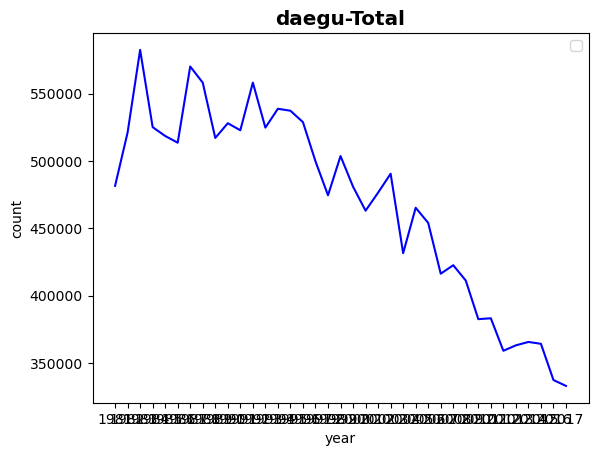

In [84]:
# 시간별 대구전출자 추세
xData = daeguDF.index
yData1 = daeguDF['전국']

print(xData.shape, yData1.shape)

plt.plot(xData, yData1, 'b-')
plt.title(f'daegu-Total' , fontdict={'weight':'bold', 'size':'x-large'})
plt.legend()
plt.ylabel('count')
plt.xlabel('year')
plt.show()

대구의 전출자는 지속적으로 감소추세에 있음

(37,) (37,)
서울특별시


C:\Users\matdo\AppData\Local\Temp\ipykernel_8068\227830883.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: 

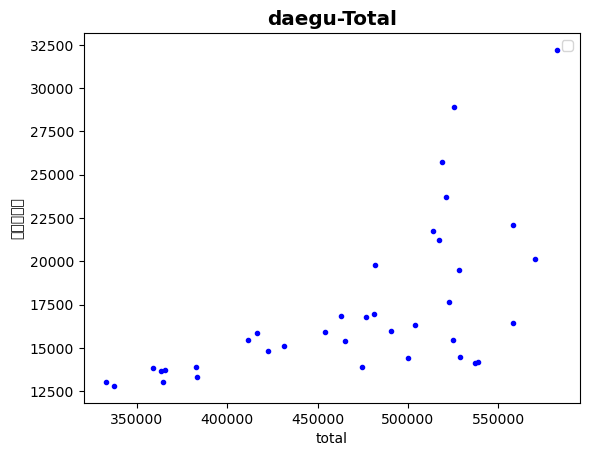

(37,) (37,)
부산광역시


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


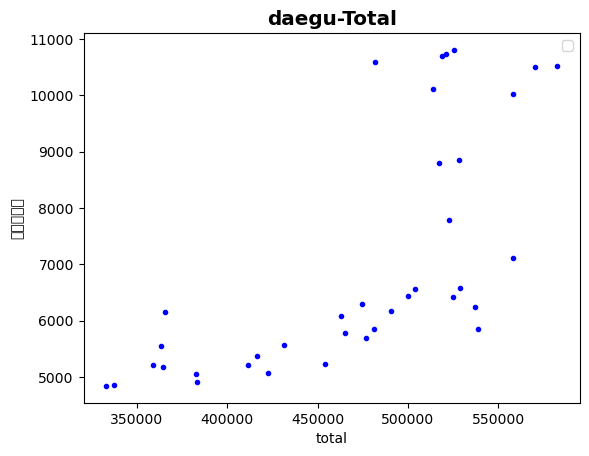

(37,) (37,)
대구광역시


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


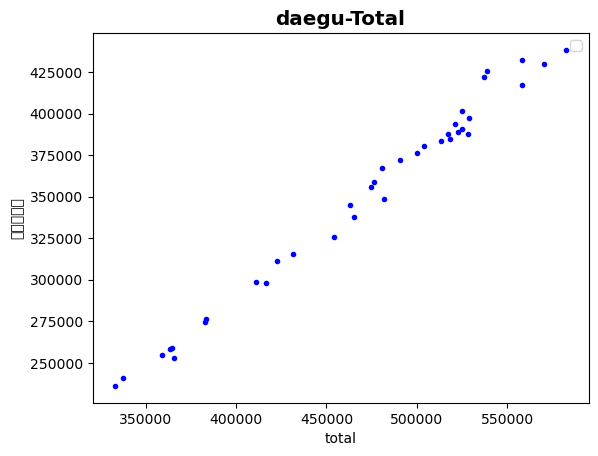

(37,) (37,)
인천광역시


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


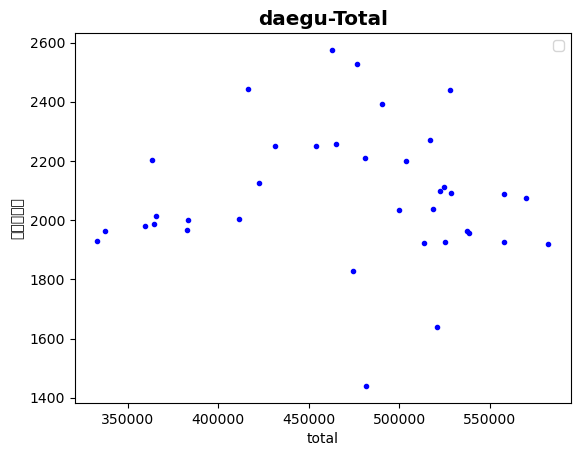

(37,) (37,)
광주광역시


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


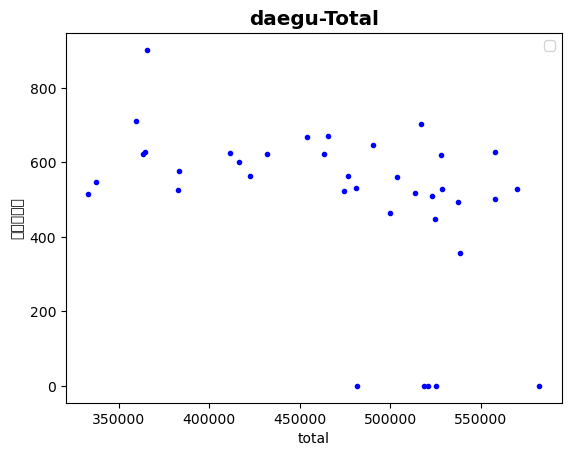

(37,) (37,)
대전광역시


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


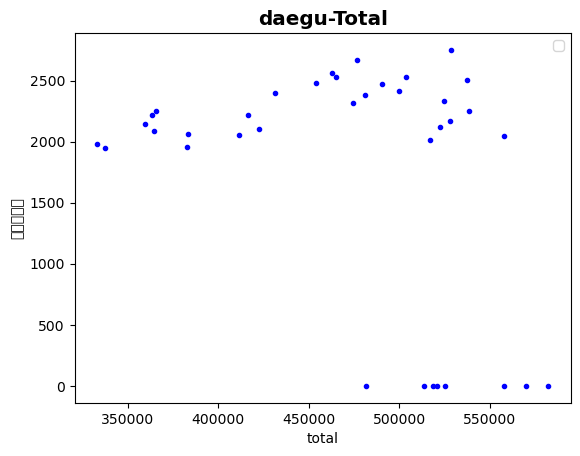

(37,) (37,)
울산광역시


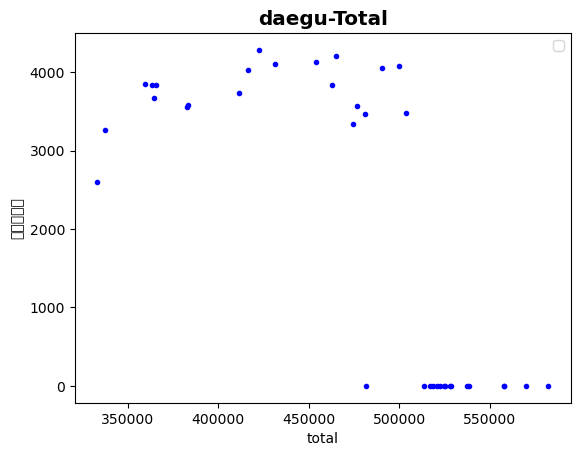

(37,) (37,)
세종특별자치시


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


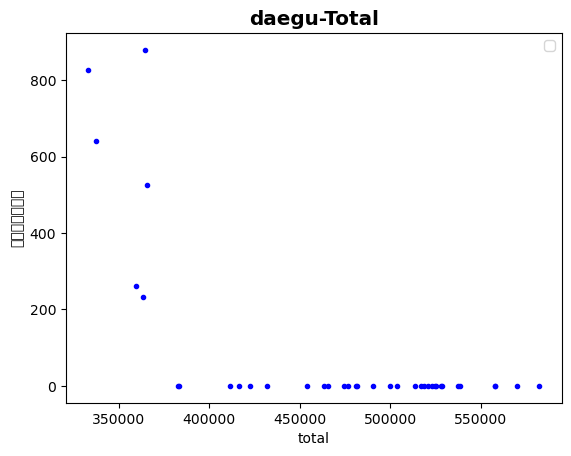

(37,) (37,)
경기도


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


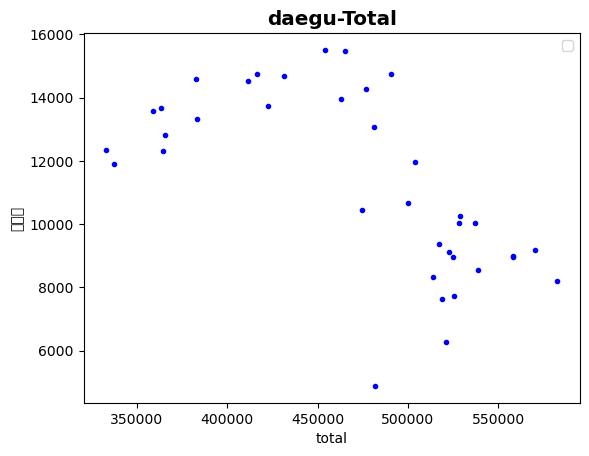

(37,) (37,)
강원도


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


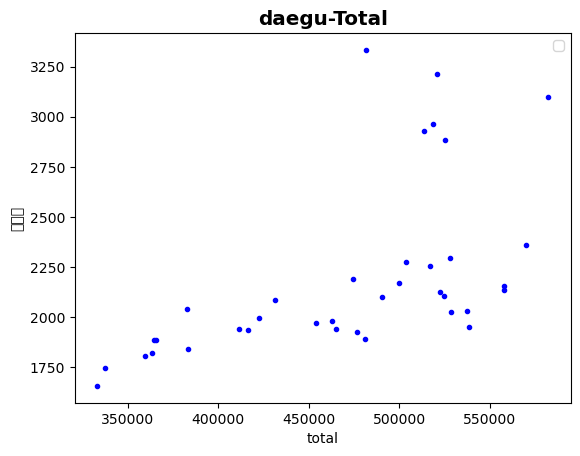

(37,) (37,)
충청북도


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


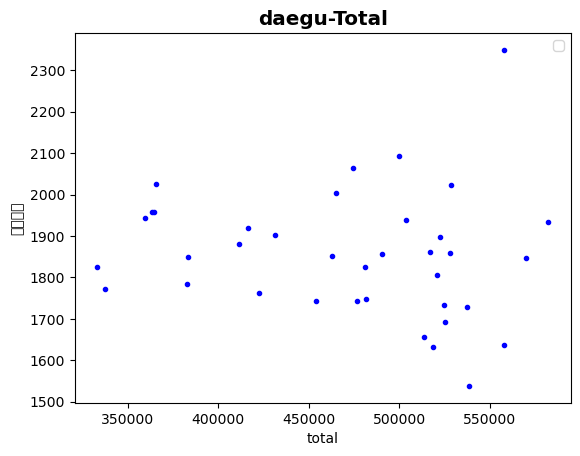

(37,) (37,)
충청남도


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


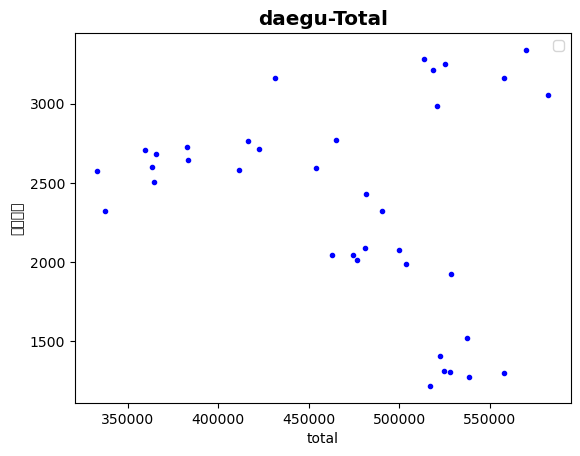

(37,) (37,)
전라북도


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


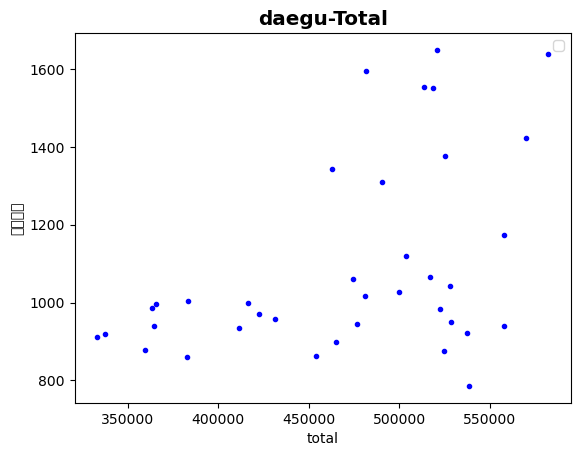

(37,) (37,)
전라남도


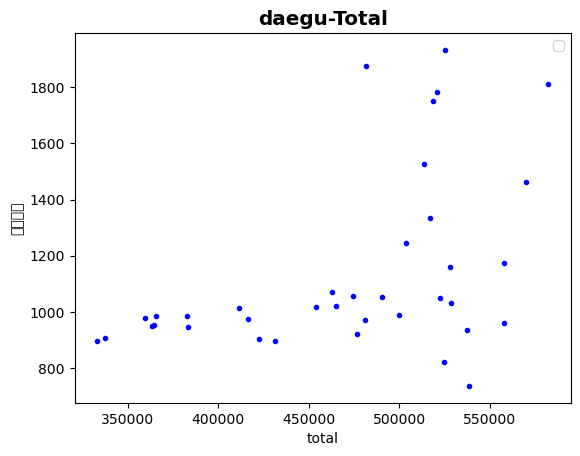

(37,) (37,)
경상북도


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


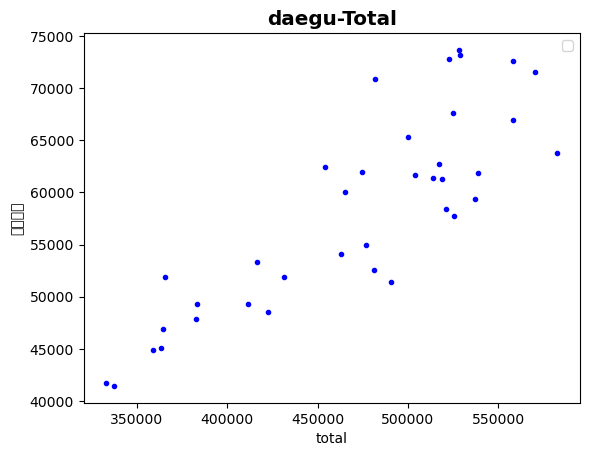

(37,) (37,)
경상남도


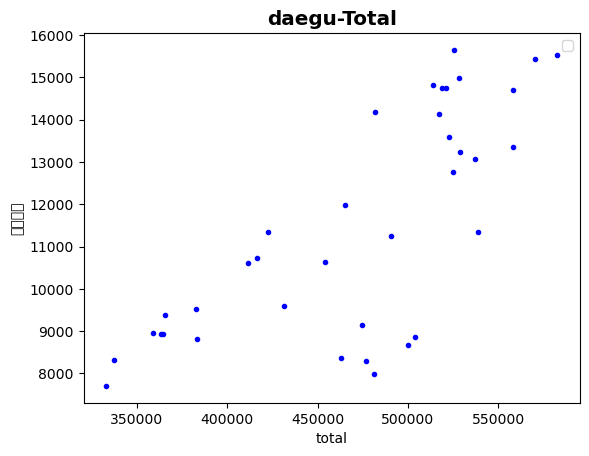

(37,) (37,)
제주특별자치도


c:\Users\matdo\anaconda3\envs\EV_PY312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


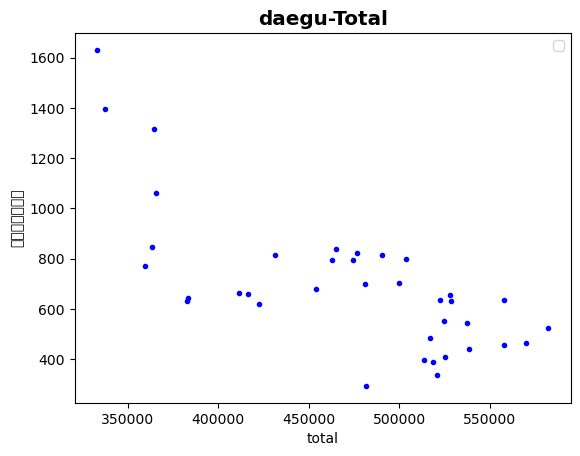

In [86]:
for i in daeguDF.columns[1:]:
    xData = daeguDF['전국']
    yData1 = daeguDF[i]
    print(xData.shape, yData1.shape)
    print(i)
    plt.plot(xData, yData1, 'b.')
    plt.title(f'daegu-Total' , fontdict={'weight':'bold', 'size':'x-large'})
    plt.legend()
    plt.ylabel(i)
    plt.xlabel('total')
    plt.show()


(37,) (37,) (37,) (37,) (37,) (37,) (37,) (37,) (37,)


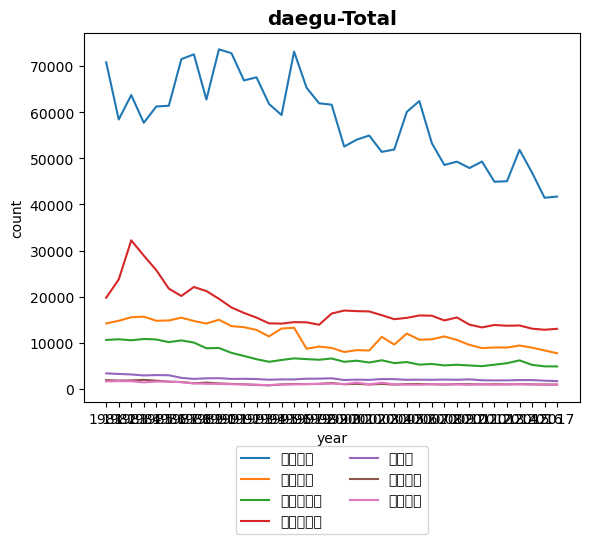

In [99]:
# 시간별 대구전출자 상세추세
xData = daeguDF.index
yData1 = daeguDF['전국']
yData2 = daeguDF['경상북도']
yData3 = daeguDF['경상남도']
yData4 = daeguDF['부산광역시']
yData5 = daeguDF['서울특별시']
yData6 = daeguDF['강원도']
yData7 = daeguDF['전라남도']
yData8 = daeguDF['전라북도']

print(xData.shape, 
      yData1.shape,
      yData2.shape,
      yData3.shape,
      yData4.shape,
      yData5.shape,
      yData6.shape,
      yData7.shape,
      yData8.shape      
      )

# plt.plot(xData, yData1, 'r-')
plt.plot(xData, yData2, '-', label='경상북도')
plt.plot(xData, yData3, '-', label='경상남도')
plt.plot(xData, yData4, '-', label='부산광역시')
plt.plot(xData, yData5, '-', label='서울특별시')
plt.plot(xData, yData6, '-', label='강원도')
plt.plot(xData, yData7, '-', label='전라남도')
plt.plot(xData, yData8, '-', label='전라북도')
plt.title(f'daegu-Total' , fontdict={'weight':'bold', 'size':'x-large'})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.ylabel('count')
plt.xlabel('year')
plt.show()

In [91]:
#상관계수
corrDF=daeguDF.corr()
corrDF['전국'].sort_values(ascending=False)

전입지별
전국         1.000000
대구광역시      0.994298
경상북도       0.851205
경상남도       0.750039
부산광역시      0.691328
서울특별시      0.618352
강원도        0.560198
전라남도       0.450653
전라북도       0.447006
인천광역시     -0.021368
충청북도      -0.110390
충청남도      -0.226233
대전광역시     -0.382205
광주광역시     -0.439076
경기도       -0.635796
세종특별자치시   -0.670726
제주특별자치도   -0.716359
울산광역시     -0.734514
Name: 전국, dtype: float64

[5] 데이터분석 및 결론
대구의 전출자는 점차로 감소하는 추세.
그 중 서울/부산/경북/경남으로의 전출은 비중이 점점 커지고 있다.
그 외지역으로는 비중이 점점 감소하는 추세.